<a href="https://colab.research.google.com/github/ulya1202/NLP/blob/main/Transformer_anatomy_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bertviz #bert visionalization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from transformers import AutoTokenizer
#AutoTokenizer — Hugging Face-in transformers kitabxanasında olan avtomatik tokenizer seçicidir. Bu sinif modelin adını verdikdə ona uyğun tokenizer-i avtomatik tapır və yükləyir.
from bertviz.transformers_neuron_view import BertModel#bert mdoel vizuallashdir , eyni modeldi elave funksiyasi var beti viallashdirmaq olur
from bertviz.neuron_view import show

model_ckpt='bert-base-uncased' #hansi modeli isteyrem
tokenizer=AutoTokenizer.from_pretrained(model_ckpt) #ada uygun caqir tokenire

model=BertModel.from_pretrained(model_ckpt)
text='time flies liike an arrow'
show(model,'bert', tokenizer, text, display_mode='light', layer=0, head=8)#0-ci layer encoder bir neceh denend encoderola bielr berte 12 den olur loop lay
#key querye tesir edir

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

100%|██████████| 440473133/440473133 [00:08<00:00, 54686599.87B/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from transformers import AutoTokenizer
model_ckpt='bert-base-uncased'
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

text='time flies like an arrow'

In [ ]:
inputs=tokenizer(text, return_tensors='pt', add_special_tokens=False) #py torch , special tokens elave etmesin

In [ ]:
inputs.input_ids

tensor([[ 2051, 10029,  2066,  2019,  8612]])

In [ ]:
from torch import nn
from transformers import AutoConfig #modeller ile ishelyende cofuguration faylinda embediingde vektorun uzunluqulayer ve s sayi yazilir, hamisi orda olur

config=AutoConfig.from_pretrained(model_ckpt) #bu modelin melumatlarin qaytar
token_embd=nn.Embedding(config.vocab_size, config.hidden_size)#bu modelde ne qeder voca size qoymushdular , ve 768 dene subword embed oliunub bu qeder
token_embd

Embedding(30522, 768)

In [ ]:
inputs_embeds=token_embd(inputs.input_ids)#[ 2051, 10029,  2066,  2019,  8612]]) # Changed token_embed to token_embd
inputs_embeds.size()

torch.Size([1, 5, 768])

In [ ]:
#Q ve Keyi vur
import torch
from math import sqrt

query=key=value=inputs_embeds #sadeleshish versiyasidi
dim_k=key.size(-1)

scores=torch.bmm(query,key.transpose(1,2))/sqrt(dim_k) #bmm batch matrix multiplication #1-ci ve 2 ci indexleri transpose ele

scores.size()

torch.Size([1, 5, 5])

In [ ]:
query.shape, key.shape , key.transpose(1,2).shape#ich terefelri beraber olaidi

(torch.Size([1, 5, 768]), torch.Size([1, 5, 768]), torch.Size([1, 768, 5]))

In [ ]:
from torch.nn.functional import softmax

weights=softmax(scores, dim=-1)
weights.sum(dim=-1)
#💡 dim=-1 → sonuncu ox, yəni sütunlar üzrə softmax alınacaq.
#Yəni:

#Hər sətir ayrılıqda normallaşdırılacaq, və sonda cəmləri 1 olacaq.
# dim=0 → (yuxarı-aşağı)

# dim=1 →  (soldan-sağa)
# """
# tensor([
#     [0.6590, 0.2424, 0.0986],
#     [0.2367, 0.6441, 0.1192]
# ])
# Hər sətirdəki ədədlər:

# weights[0].sum() ≈ 1.0
# weights[1].sum() ≈ 1.0
# """

'\ntensor([\n    [0.6590, 0.2424, 0.0986],\n    [0.2367, 0.6441, 0.1192]\n])\nHər sətirdəki ədədlər:\n\nweights[0].sum() ≈ 1.0\nweights[1].sum() ≈ 1.0\n'

In [ ]:
attn_outputs=torch.bmm(weights,value) #Value iel softmaxi vurruq  #torch bmm bilmedim nedi niye matmul yox bu
attn_outputs.shape

torch.Size([1, 5, 768])

In [ ]:
# """
# Söz 1: [A A A A A A A A A A ...] → 768--------------------------> diqqet bu A A A - sozler deyil , onun embeddingelridri!yeni embeddingi nmuxtelif xusussiyyetlerine baxir
#         |_______| → Head 1 baxır
#                 |_______| → Head 2 baxır
#                         |_______| → Head 3 baxır

# Söz 2: [B B B B B B B B B B ...]
#         |_______| → Head 1 baxır
#                 |_______| → Head 2 baxır
#                         |_______| → Head 3 baxır
# Yəni paralel “zoom”lar.
# Head 1 → kontekstual əlaqələr

# Head 2 → sintaktik bağlılıqlar

# Head 3 → semantik uyğunluqlar
# """

'\nSöz 1: [A A A A A A A A A A ...] → 768--------------------------> diqqet bu A A A - sozler deyil , onun embeddingelridri!yeni embeddingi nmuxtelif xusussiyyetlerine baxir\n        |_______| → Head 1 baxır\n                |_______| → Head 2 baxır\n                        |_______| → Head 3 baxır\n\nSöz 2: [B B B B B B B B B B ...]\n        |_______| → Head 1 baxır\n                |_______| → Head 2 baxır\n                        |_______| → Head 3 baxır\nYəni paralel “zoom”lar.\nHead 1 → kontekstual əlaqələr\n\nHead 2 → sintaktik bağlılıqlar\n\nHead 3 → semantik uyğunluqlar\n'

 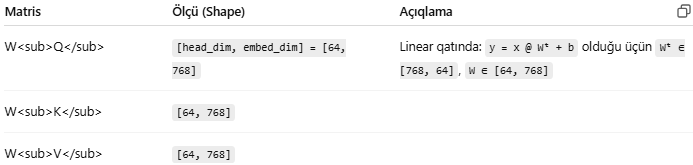bizde attention headler ,
bizim sozlerimiz embeddingelrinin  n mueyyen hiselreni fokuslanirlar .yuxarida yazmisham  gormek olur ki biz embeddingimizi
bir nov headlerin sayina boluruk ve bu bizde her --> head---> mueyeyn hisselre odaklanir. bu zamana onun ayrica W matrislseri de olur.


In [ ]:
# """
#                 [1.0 1.0 0.0]   [0.0 1.0 1.0]   [0.5 1.0 0.5]   [1.0 2.0 1.0]   [0.2 1.0 0.8]   ← Keylər (transposed Wk)
#                 ┌──────────────┬──────────────┬──────────────┬──────────────┬──────────────┐
# [I]             │    1.00      │    0.50      │    1.00      │    2.00      │    1.00      │
# [1 0 1]         ├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
# [love]          │    0.00      │    0.00      │    0.50      │    1.00      │    0.40      │
# [0 1 -1]        ├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
# [data]          │     1.00     │    0.75      │    1.25      │    2.50      │    1.20      │
# [0.5 0.5 0]     ├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
# [science]       │    2.00      │    1.00      │    1.50      │    3.00      │    2.00      │
# [1 1 0]         ├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
# [chat]          │    0.60      │    0.40      │    0.86      │    1.72      │    1.20      │
# [0.2 0.8 -0.6]  └──────────────┴──────────────┴──────────────┴──────────────┴──────────────┘
#                    ↑                ↑                ↑                ↑                ↑
#                     Key₀           Key₁           Key₂           Key₃           Key₄
# """

'\n                [1.0 1.0 0.0]   [0.0 1.0 1.0]   [0.5 1.0 0.5]   [1.0 2.0 1.0]   [0.2 1.0 0.8]   ← Keylər (transposed Wk)\n                ┌──────────────┬──────────────┬──────────────┬──────────────┬──────────────┐\n[I]             │    1.00      │    0.50      │    1.00      │    2.00      │    1.00      │\n[1 0 1]         ├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤\n[love]          │    0.00      │    0.00      │    0.50      │    1.00      │    0.40      │\n[0 1 -1]        ├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤\n[data]          │     1.00     │    0.75      │    1.25      │    2.50      │    1.20      │\n[0.5 0.5 0]     ├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤\n[science]       │    2.00      │    1.00      │    1.50      │    3.00      │    2.00      │\n[1 1 0]         ├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤\n[chat]          │    0.60    

In [ ]:
def scaled_dot_product_attention(query, key, value): #toy
    dim_k=key.size(-1)
    scores=torch.bmm(query, key.transpose(1,2))/sqrt(dim_k)
    weights=softmax(scores, dim=-1)#artqi nizde m query key matrisi yanrandiqi uchun biz valuelere viranda onu transpose etmirk
    return torch.bmm(weights,value)

In [ ]:
# 🧠 Hər Head öz fərdi baxış bucağı ilə eyni embedding-lərə baxır.

class AttentionHead(nn.Module):#layer duzletmek uchun--> Module yoxsa layer olaraq gormur
    def __init__(self, embed_dim, head_dim):
        super().__init__()
        self.q=nn.Linear(embed_dim, head_dim)#dense layridi # daxil olur bizim embediing sizi emebd size , cixir head dimsinions kimi
        self.k=nn.Linear(embed_dim, head_dim)#💡 Burdakı Linear qatlar Wq, Wk, Wv matrisləri kimi işləyir #y = x @ W.T + b--> burdaki W- ele bizim Wk Wv Wq matrislerimizdi
        self.v=nn.Linear(embed_dim, head_dim)

    def forward(self, hidden_state): #call methodu tf-da
        attn_outputs=scaled_dot_product_attention(
            self.q(hidden_state), self.k(hidden_state), self.v(hidden_state) # Changed self.h to self.k
        )
        return attn_outputs


In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        embed_dim=config.hidden_size# 768 #Çünki MultiHeadAttention qatının daxilinə embedding vektorları (yəni hidden_state) daxil olur. Onların ölçüsü hidden_size-dir.
        num_heads=config.num_attention_heads#12
        head_dim=embed_dim//num_heads #embed/12 stanart

        self.heads=nn.ModuleList(
            [AttentionHead(embed_dim, head_dim) for _ in range(num_heads)]
        ) #adi listdi liste ealve et eger adi lite yazsaydiq gradient kimi updat etmeyeckdi ,tenserflowda adi listde ishleyir , burda update olmur

        self.output_linear=nn.Linear(head_dim*num_heads, embed_dim) #dense--> hem headlaerin cavablairn umumileshdirsin , hem deolchu birden ef olarsa duzeltsinki layernormda fln ishelye bilsin

    def forward(self, hidden_state):
        x=torch.cat([h(hidden_state) for h in self.heads], dim=-1) #her headi  conactenat eel hansi dimensions uzre
        x=self.output_linear(x)
        return x


In [ ]:
attn_outputs=MultiHeadAttention(config)(inputs_embeds)
attn_outputs.size() #zenginleshdirilib

torch.Size([1, 5, 768])

In [ ]:
from bertviz import head_view #######daha deqi bax
from transformers import AutoModel, AutoTokenizer

model_ckpt='bert-base-uncased'
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

model = AutoModel.from_pretrained(model_ckpt,output_attentions=True)

sentence_a='time flies like an arrow'
sentence_b='fruit flies like a banana'

#token_type_ids, modelə "qardaş, bu söz birinci cümlədədir, o isə ikinci" — bunu deyir. Model də diqqətini (attention) buna uyğun qurur.--> positional embedding kimi

viz_inputs=tokenizer(sentence_a, sentence_b, return_tensors='pt')

model_outputs = model(**viz_inputs)
attention = model_outputs.attentions #Bəli, attention — sözlərin bir-birinə verdiyi "önəm" (dəyər) matrisidir. q*k

sentence_b_start=(viz_inputs.token_type_ids==0).sum(dim=1)#Yəni, hər cümlədə token_type_id == 0 olan tokenlərin sayını tapırıq.
#Bu sətir cümlə A-nın neçə token uzunluqda olduğunu hesablayır → deməli, cümlə B ondan sonra başlayır.
tokens=tokenizer.convert_ids_to_tokens(viz_inputs.input_ids[0])#[0]- yazdiq k  birinci batchden cixardaq [[]]

head_view(attention, tokens, sentence_b_start, heads=[8])

<IPython.core.display.Javascript object>

In [ ]:
viz_inputs.input_ids[0]

tensor([  101,  2051, 10029,  2066,  2019,  8612,   102,  5909, 10029,  2066,
         1037, 15212,   102])

In [ ]:
viz_inputs.token_type_ids==0

tensor([[ True,  True,  True,  True,  True,  True,  True, False, False, False,
         False, False, False]])

In [ ]:
viz_inputs

{'input_ids': tensor([[  101,  2051, 10029,  2066,  2019,  8612,   102,  5909, 10029,  2066,
          1037, 15212,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.linear1=nn.Linear(config.hidden_size, config.intermediate_size)
        self.linear2=nn.Linear(config.intermediate_size, config.hidden_size)
        self.gelu=nn.GELU() #activation
        # Changed the attribute name from hidden_dropout_proba to hidden_dropout_prob
        self.dropout=nn.Dropout(config.hidden_dropout_prob)

    def forward(self,x):
        x=self.linear1(x)
        x=self.gelu(x)
        x=self.linear2(x)
        x=self.dropout(x)
        return x

feed_forward=FeedForward(config)
ff_outputs=feed_forward(attn_outputs)
ff_outputs.size()

torch.Size([1, 5, 768])

Bu, ilk fully connected layer-dir.

Input: hidden_size → bu BERT-də 768-dir.

Output: intermediate_size → bu adətən daha böyükdür, məsələn, 3072.

Niyə hidden_size → intermediate_size?

Transformer-lərdə bu ilk qat inputu daha yüksək ölçülü məkana aparır ki, məlumatı daha yaxşı öyrənsin.

Məsələn, BERT-base: 768 → 3072 → 768

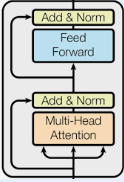

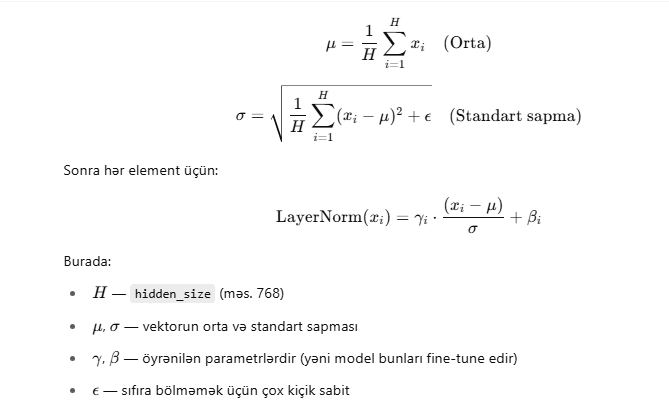

In [ ]:
class TransformerEncoderLayer(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.layer_norm1=nn.LayerNorm(config.hidden_size)
        self.layer_norm2=nn.LayerNorm(config.hidden_size)
        self.attention=MultiHeadAttention(config)
        self.feed_forward=FeedForward(config) # Corrected typo here

    def forward(self, x):
        # Corrected typo: changed hidden_satate to hidden_state
        hidden_state=self.layer_norm1(x) #normilez olur
        x=x+self.attention(hidden_state)
        # Corrected typo: changed self.feed_forwars to self.feed_forward
        x=x+self.feed_forward(self.layer_norm2(x))
        return x

In [ ]:
encoder_layer = TransformerEncoderLayer(config)
inputs_embeds.shape, encoder_layer(inputs_embeds).size()  # Changed inputs_embed to inputs_embeds

(torch.Size([1, 5, 768]), torch.Size([1, 5, 768]))

In [ ]:
config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.51.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [ ]:
import torch
from torch import nn
from transformers import AutoConfig

class Embedding(nn.Module):
    def __init__(self,config):
        super().__init__() # Add this line
        self.token_embeddings=nn.Embedding(config.vocab_size, config.hidden_size) #tokenin her bir sozun --her szo
        self.position_embeddings=nn.Embedding(config.max_position_embeddings, config.hidden_size) #cumle uzunluqu 512 reem yarat
        self.layer_norm=nn.LayerNorm(config.hidden_size, eps=1e-12)

        self.dropout=nn.Dropout()

    def forward(self, input_ids):

        seq_length=input_ids.size(1)#cumle uzunluqu
        position_ids=torch.arange(seq_length, dtype=torch.long).unsqueeze(0) #int64 -->torch long
        #Embedding qatları yalnız int64 (torch.long) tipli indeksləri qəbul edir.
        #torch.arange(seq_length) → bu sadəcə [0, 1, 2, ..., seq_length-1] ölçüsündə 1D tensor verir.  .unsqueeze(0) → bu tensora batch ölçüsü əlavə edir.

        token_embeddings=self.token_embeddings(input_ids)
        position_embeddings=self.position_embeddings(position_ids)

        embeddings=token_embeddings+position_embeddings

        embeddings=self.layer_norm(embeddings)
        embeddings=self.dropout(embeddings)
        return embeddings

# bizde residual connectionslar coxdu ona gor cemlenir istemirk ki explosiun olsun cox boyuk qiymetelr ona gore norm edirik
#Dropout əslində:
# Bəzi vəktoru elementlərini sıfıra çevirir.
# Bu, modelin bəzi məlumatları "itirməsinə" səbəb olur.
# Məqsəd: Model hər şeyə eyni dərəcədə etibar etməsin, yəni həddindən artıq bağlanmasın bəzi xüsusiyyətlərə.
embedding_layer=Embedding(config)
embedding_layer(inputs.input_ids).size() # Corrected variable name and input

torch.Size([1, 5, 768])

In [ ]:
class TransformerEncoder(nn.Module): # bu qeder hidden layeren kecir
    def __init__(self, config):
        super().__init__()
        self.embeddings=Embedding(config)
        self.layers=nn.ModuleList([TransformerEncoderLayer(config) for _ in range(config.num_hidden_layers)]) #adi list di

    def forward(self, x):
        x=self.embeddings(x) #positional +token
        for layer in self.layers:
            x=layer(x) #layrlerden encoder layerlerden kecir cixart
        return x

# Adding a Classification Head

In [ ]:
#gelin huguun g facedek modeli kopyalamaqa calishq

class TransformerForSequenceClassifiaction(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.encoder=TransformerEncoder(config)#pos+token embed --> encoder --> feedf-->           -->drp-->classifir
        self.dropout=nn.Dropout(config.hidden_dropout_prob)
        self.classifier=nn.Linear(config.hidden_size, config.num_labels)#input output

    def forward(self, x):
        x=self.encoder(x)[:,0,:] #cls tookeni olur 0-ci soz , butun embedding qymetlerini butun batchlaradan #CLS__??????
        x=self.dropout(x)
        x=self.classifier(x)
        return x

In [ ]:
config.num_labels=3
encoder_classifier=TransformerForSequenceClassifiaction(config)
encoder_classifier(inputs.input_ids).size()

torch.Size([1, 3])

# The Decoder
Mask multihead ferqlidi

In [ ]:
seq_len=inputs.input_ids.size(-1)
seq_len

5

In [ ]:
mask=torch.tril(torch.ones(seq_len, seq_len)).unsqueeze(0)#batch halina saliriq#Batch ölçüsü olmadan bu maskanı çoxlu nümunəyə tətbiq edə bilmərik. .unsqueeze(0) ilə bunu 1 nümunəlik batch halına salırıq.
mask[0]

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [ ]:
scores.masked_fill(mask==0, -float('inf')) #softmax(q*k) -inf olndaonlardan cixa 0 olur dusturda

tensor([[[26.5225,    -inf,    -inf,    -inf,    -inf],
         [-2.0953, 30.8416,    -inf,    -inf,    -inf],
         [-1.1290,  1.4693, 28.3364,    -inf,    -inf],
         [ 1.9519, -1.9808, -0.2112, 28.8379,    -inf],
         [-0.1884, -0.8555, -0.9146,  0.2474, 28.2889]]],
       grad_fn=<MaskedFillBackward0>)

In [ ]:
softmax(scores.masked_fill(mask==0, -float('inf')), dim=-1)

tensor([[[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [4.9622e-15, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.5970e-13, 2.1466e-12, 1.0000e+00, 0.0000e+00, 0.0000e+00],
         [2.1065e-12, 4.1267e-14, 2.4219e-13, 1.0000e+00, 0.0000e+00],
         [4.2900e-13, 2.2015e-13, 2.0752e-13, 6.6331e-13, 1.0000e+00]]],
       grad_fn=<SoftmaxBackward0>)

In [ ]:
def scaled_dot_product_attention(query, key, value, mask=None):
    dim_k=key.size(-1)
    scores=torch.bmm(query, key.transpose(1,2))/sqrt(dim_k)
    if mask is not None:
        scores=scores.masked_fill(mask, float('-inf'))
    weights=softmax(scores, dim=-1)
    return torch.bmm(weights, value)

In [ ]:
from transformers import AutoTokenizer
